In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [25]:
rng = np.random.default_rng(seed=12345)

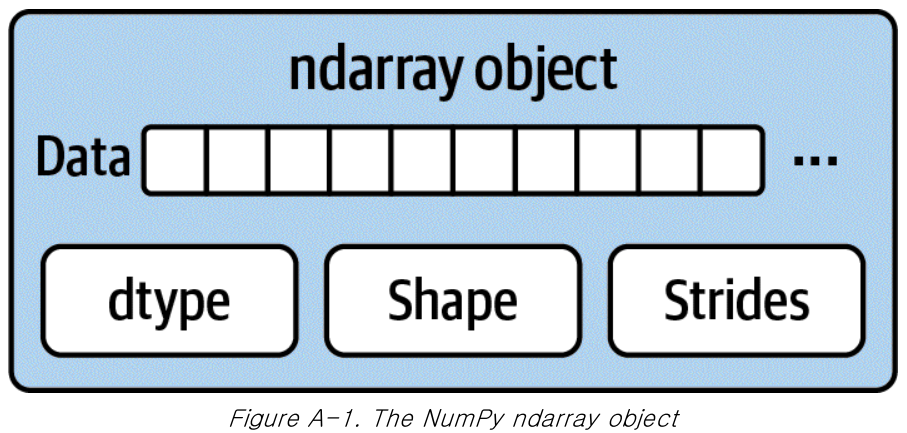

The ndarray internally consists of the following:
- A pointer to data—that is, a block of data in RAM or in a memorymapped file
- The data type or dtype describing fixed-size value cells in the array
- A tuple indicating the array’s shape
- A tuple of strides—integers indicating the number of bytes to “step” in order to advance one element along a dimension

In [3]:
np.ones((10, 5)).shape

(10, 5)

In [4]:
np.ones((3, 4, 5), dtype=np.float64).strides

(160, 40, 8)

the data types have superclasses, such as
np.integer and np.floating, which can be used with the np.issubdtype
function:

In [5]:
ints = np.ones(10, dtype=np.uint16)
floats = np.ones(10, dtype=np.float32)
np.issubdtype(ints.dtype, np.integer)


In [ ]:
np.issubdtype(floats.dtype, np.floating)

You can see all of the parent classes of a specific data type by calling the
type’s mro method:

In [6]:
np.float64.mro()

Therefore, we also have:

In [7]:
np.issubdtype(ints.dtype, np.number)

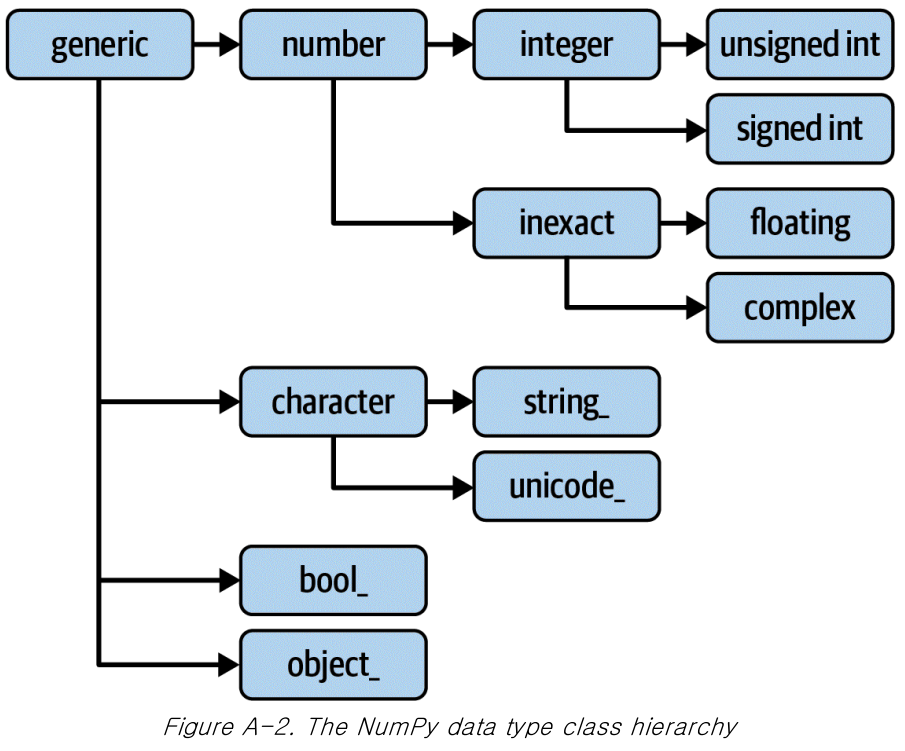

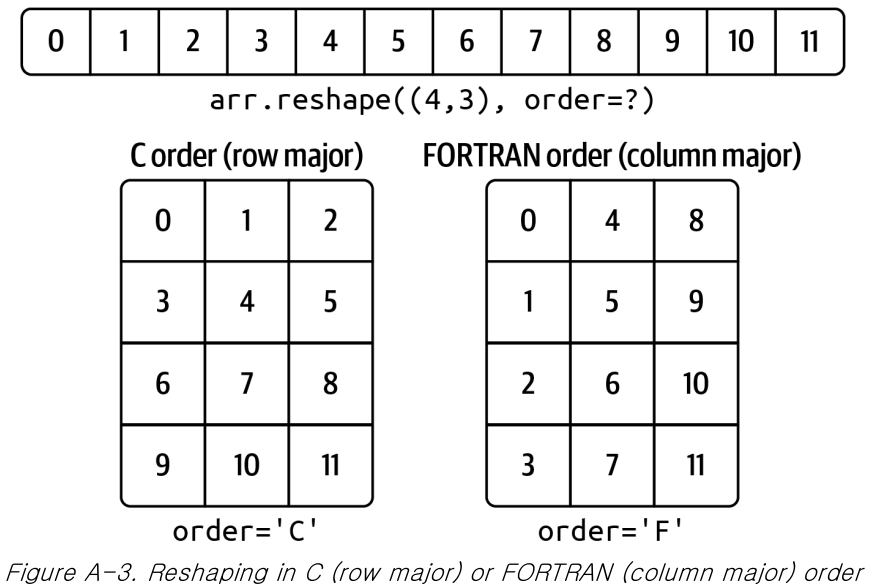

In [8]:
arr = np.arange(8)
arr
arr.reshape((4, 2))

In [9]:
arr.reshape((4, 2)).reshape((2, 4))

One of the passed shape dimensions can be –1, in which case the value
used for that dimension will be inferred from the data:

In [10]:
arr = np.arange(15)
arr.reshape((5, -1))

Since an array’s shape attribute is a tuple, it can be passed to reshape,
too:

In [11]:
other_arr = np.ones((3, 5))
other_arr.shape


In [ ]:
arr.reshape(other_arr.shape)

The opposite operation of reshape from one-dimensional to a higher
dimension is typically known as flattening or raveling:

In [12]:
arr = np.arange(15).reshape((5, 3))
arr


In [ ]:
arr.ravel()

The flatten method behaves like ravel except it always returns a copy of
the data:

In [13]:
arr.flatten()

Functions like reshape and ravel accept an order argument indicating the
order to use the data in the array. This is usually set to 'C' or 'F' in most
cases (there are also less commonly used options 'A' and 'K'):

In [14]:
arr = np.arange(12).reshape((3, 4))
arr


In [ ]:
arr.ravel()


In [ ]:
arr.ravel('F')

The key difference between C and FORTRAN order is
the way in which the dimensions are walked:
C/row major orderTraverse higher dimensions first (e.g., axis 1 before advancing on axis
0).
FORTRAN/column major order
Traverse higher dimensions last (e.g., axis 0 before advancing on axis 1).

numpy.concatenate takes a sequence (tuple, list, etc.) of arrays and joins
them in order along the input axis:

In [5]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
np.concatenate([arr1, arr2], axis=0)


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [6]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

There are some convenience functions, like vstack and hstack, for
common kinds of concatenation. The preceding operations could have
been expressed as:

In [7]:
np.vstack((arr1, arr2))


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
np.hstack((arr1, arr2))

split, on the other hand, slices an array into multiple arrays along an axis:

In [17]:
arr = rng.standard_normal((5, 2))
arr


In [ ]:
first, second, third = np.split(arr, [1, 3])
first


In [ ]:
second


In [ ]:
third

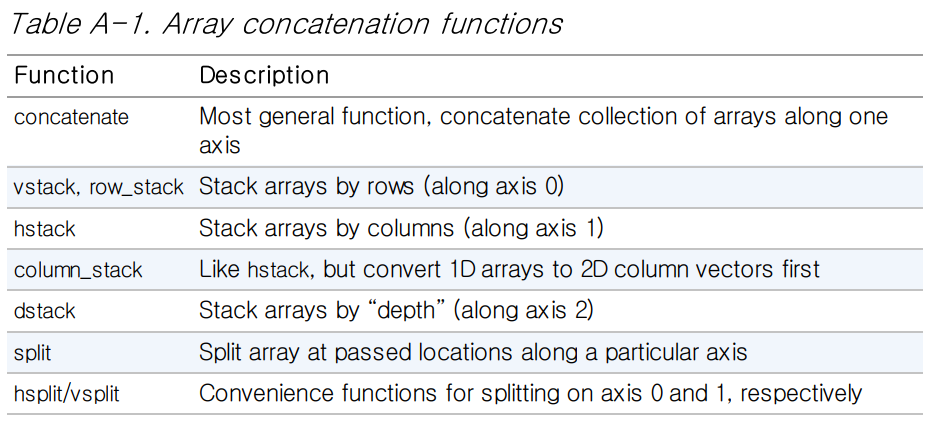

There are two special objects in the NumPy namespace, r_ and c_, that
make stacking arrays more concise:

In [11]:
arr = np.arange(6)
arr


array([0, 1, 2, 3, 4, 5])

In [12]:
arr1 = arr.reshape((3, 2))
arr1

array([[0, 1],
       [2, 3],
       [4, 5]])

In [13]:
arr2 = rng.standard_normal((3, 2))
arr2

array([[-1.3678,  0.6489],
       [ 0.3611, -1.9529],
       [ 2.3474,  0.9685]])

In [14]:
np.r_[arr1, arr2]

array([[ 0.    ,  1.    ],
       [ 2.    ,  3.    ],
       [ 4.    ,  5.    ],
       [-1.3678,  0.6489],
       [ 0.3611, -1.9529],
       [ 2.3474,  0.9685]])

In [15]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.    ,  1.    ,  0.    ],
       [ 2.    ,  3.    ,  1.    ],
       [ 4.    ,  5.    ,  2.    ],
       [-1.3678,  0.6489,  3.    ],
       [ 0.3611, -1.9529,  4.    ],
       [ 2.3474,  0.9685,  5.    ]])

These additionally can translate slices to arrays:

In [16]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

Two useful tools for repeating or replicating arrays to produce larger arrays
are the repeat and tile functions. repeat replicates each element in an
array some number of times, producing a larger array:

In [20]:
arr = np.arange(3)
arr


In [ ]:
arr.repeat(3)

If you pass an array of integers, each element can be
repeated a different number of times:

In [21]:
arr.repeat([2, 3, 4])

Multidimensional arrays can have their elements repeated along a particular
axis:

In [22]:
arr = rng.standard_normal((2, 2))
arr


In [ ]:
arr.repeat(2, axis=0)

Note that if no axis is passed, the array will be flattened first, which is
likely not what you want. Similarly, you can pass an array of integers when
repeating a multidimensional array to repeat a given slice a different number
of times:

In [23]:
arr.repeat([2, 3], axis=0)


In [ ]:
arr.repeat([2, 3], axis=1)

tile, on the other hand, is a shortcut for stacking copies of an array along
an axis.

In [24]:
arr
np.tile(arr, 2)

The second argument is the number of tiles; with a scalar, the tiling is
made row by row, rather than column by column. The second argument to
tile can be a tuple indicating the layout of the “tiling”:

In [25]:
arr
np.tile(arr, (2, 1))


In [ ]:
np.tile(arr, (3, 2))

one way to get and set subsets of
arrays is by fancy indexing using integer arrays:

In [17]:
arr = np.arange(10) * 100
inds = [7, 1, 2, 6]
arr[inds]

array([700, 100, 200, 600])

There are alternative ndarray methods that are useful in the special case of
making a selection only on a single axis:

In [18]:
arr.take(inds)


array([700, 100, 200, 600])

In [19]:
arr.put(inds, 42)
arr


array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

put does not accept an axis argument but rather indexes into the flattened
(one-dimensional, C order) version of the array. Thus, when you need to
set elements using an index array on other axes, it is best to use []-
based indexing.

In [ ]:
arr.put(inds, [40, 41, 42, 43])
arr

To use take along other axes, you can pass the axis keyword:

In [28]:
inds = [2, 0, 2, 1]
arr = rng.standard_normal((2, 4))
arr


In [ ]:
arr.take(inds, axis=1)

Broadcasting:
The simplest example of broadcasting occurs when
combining a scalar value with an array:

In [29]:
arr = np.arange(5)
arr
arr * 4

we can demean each column of an array by subtracting the
column means.

In [30]:
arr = rng.standard_normal((4, 3))
arr.mean(0)


In [ ]:
demeaned = arr - arr.mean(0)
demeaned


In [ ]:
demeaned.mean(0)

THE BROADCASTING RULE:
Two arrays are compatible for broadcasting if for each trailing
dimension (i.e., starting from the end) the axis lengths match or if
either of the lengths is 1. Broadcasting is then performed over the
missing or length 1 dimensions.


![image.png](attachment:image.png)

According to the rules, to subtract over axis 1 (i.e., subtract the
row mean from each row), the smaller array must have the shape (4, 1):
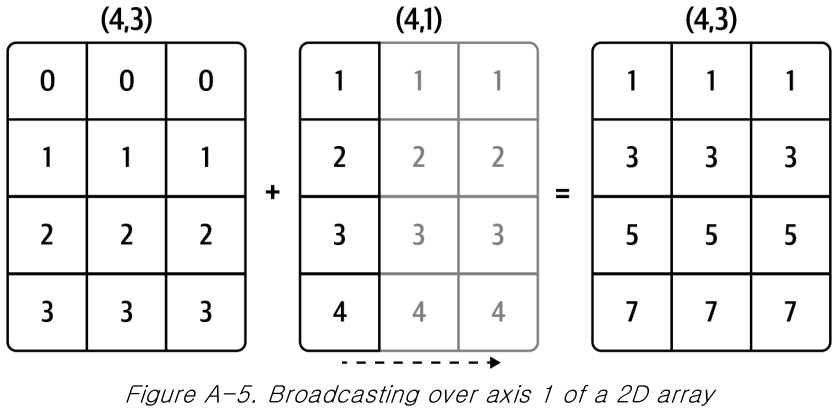

In [31]:
arr
row_means = arr.mean(1)


In [ ]:
row_means.shape
row_means.reshape((4, 1))


In [ ]:
demeaned = arr - row_means.reshape((4, 1))


In [ ]:
demeaned.mean(1)

If you don’t follow the rules, you’ll
get an error like this:

In [32]:
arr - arr.mean(1)

According to the broadcasting rule, 
the “broadcast dimensions” must be 1 in the smaller array. 

In [33]:
arr - arr.mean(1).reshape((4, 1))

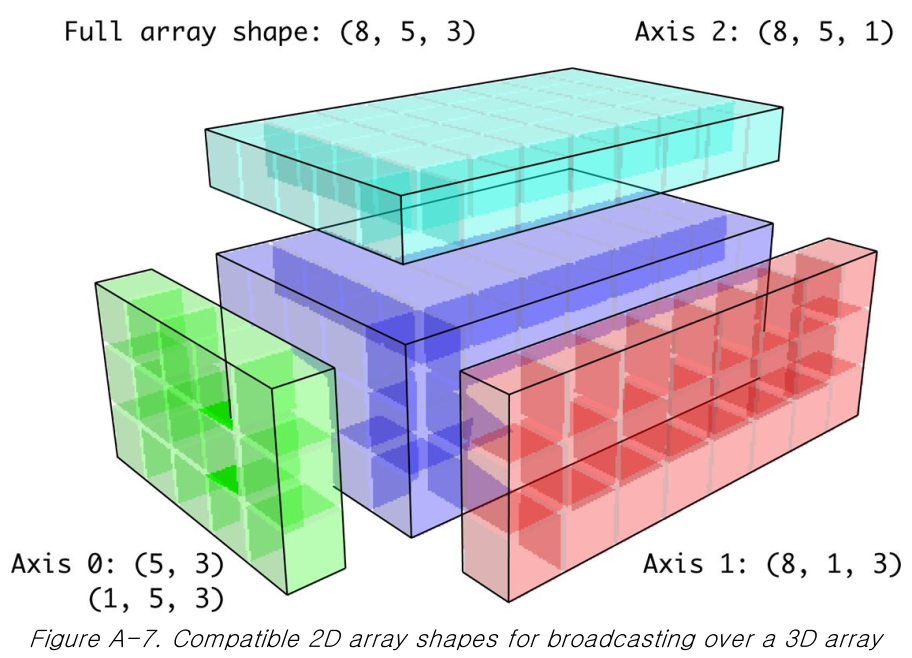

NumPy arrays offer a special
syntax for inserting new axes by indexing. We use the special np.newaxis
attribute along with “full” slices to insert the new axis:

In [5]:
arr = np.zeros((4, 4))
arr_3d = arr[:, np.newaxis, :]
arr_3d.shape


(4, 1, 4)

In [6]:
arr_1d = rng.standard_normal(3)
arr_1d[:, np.newaxis]


NameError: name 'rng' is not defined

In [ ]:
arr_1d[np.newaxis, :]

if we had a three-dimensional array and wanted to demean axis 2,
we would need to write:

In [35]:
arr = rng.standard_normal((3, 4, 5))
depth_means = arr.mean(2)
depth_means


In [ ]:
depth_means.shape


In [ ]:
demeaned = arr - depth_means[:, :, np.newaxis]
demeaned.mean(2)

The same broadcasting rule governing arithmetic operations also applies to
setting values via array indexing.

In [36]:
arr = np.zeros((4, 3))
arr[:] = 5
arr

However, if we had a one-dimensional array of values we wanted to set
into the columns of the array, we can do that as long as the shape is
compatible

In [16]:
col =np.array([1.28, -0.42, 0.44, 1.6])
arr[:] =col[:, np.newaxis]
arr


array([[ 1.28],
       [-0.42],
       [ 0.44],
       [ 1.6 ]])

In [17]:
arr[:2] = [[-1.37], [0.509]]
arr

array([[-1.37 ],
       [ 0.509],
       [ 0.44 ],
       [ 1.6  ]])

Advanced ufunc Usage:
reduce takes a single array and aggregates its values, optionally along an
axis, by performing a sequence of binary operations. For example, an
alternative way to sum elements in an array is to use np.add.reduce:

In [38]:
arr = np.arange(10)
np.add.reduce(arr)


In [ ]:
arr.sum()

As a less mundane example, we can use np.logical_and to check whether the values in each
row of an array are sorted. Note that logical_and.reduce is equivalent to the all method.

In [18]:
my_rng = np.random.default_rng(12346)  # for reproducibility
arr = my_rng.standard_normal((5, 5))
arr


array([[-0.9039,  0.1571,  0.8976, -0.7622, -0.1763],
       [ 0.053 , -1.6284, -0.1775,  1.9636,  1.7813],
       [-0.8797, -1.6985, -1.8189,  0.119 , -0.4441],
       [ 0.7691, -0.0343,  0.3925,  0.7589, -0.0705],
       [ 1.0498,  1.0297, -0.4201,  0.7863,  0.9612]])

In [20]:
arr[::2].sort(1) # sort a few rows
arr[:, :-1] < arr[:, 1:]


array([[ True,  True,  True,  True],
       [False,  True,  True, False],
       [ True,  True,  True,  True],
       [False,  True,  True, False],
       [ True,  True,  True,  True]])

In [21]:
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1)

array([ True, False,  True, False,  True])

The accumulate ufunc method is related to reduce, like cumsum is related
to sum. It produces an array of the same size with the intermediate
“accumulated” values:

In [40]:
arr = np.arange(15).reshape((3, 5))
np.add.accumulate(arr, axis=1)

outer performs a pair-wise cross product between two arrays:

In [22]:
arr = np.arange(3).repeat([1, 2, 2])
arr


array([0, 1, 1, 2, 2])

In [23]:
np.multiply.outer(arr, np.arange(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8],
       [0, 2, 4, 6, 8]])

The output of outer will have a dimension that is the concatenation of the
dimensions of the inputs:

In [29]:
x, y = rng.standard_normal((3, 4)), rng.standard_normal(5)
result = np.subtract.outer(x, y)
result.shape

(3, 4, 5)

The last method, reduceat, performs a “local reduce,” in essence an
array “group by” operation in which slices of the array are aggregated
together. It accepts a sequence of “bin edges” that indicate how to split
and aggregate the values:

In [31]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.add.reduceat(arr, [0, 5, 8])

The results are the reductions (here, sums) performed over arr[0:5],
arr[5:8], and arr[8:]. As with the other methods, you can pass an axis
argument:

In [44]:
arr = np.multiply.outer(np.arange(4), np.arange(5))
arr


In [ ]:
np.add.reduceat(arr, [0, 2, 4], axis=1)

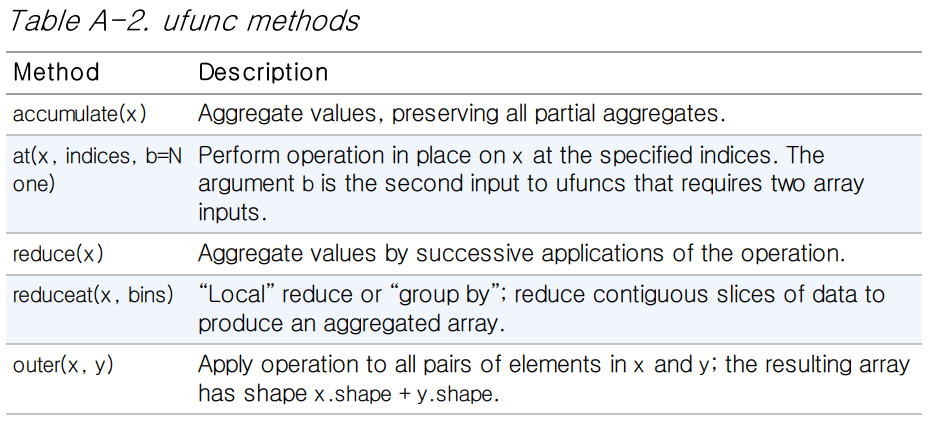

Writing New ufuncs in Python:
numpy.frompyfunc accepts a Python function along with a specification for
the number of inputs and outputs. For example, a simple function that
adds element-wise would be specified as:

In [32]:
def add_elements(x, y):
    return x + y
add_them = np.frompyfunc(add_elements, 2, 1)
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

there is an alternative
(but slightly less feature rich) function, numpy.vectorize, that allows you to
specify the output type:

In [46]:
add_them = np.vectorize(add_elements, otypes=[np.float64])
add_them(np.arange(8), np.arange(8))

These functions provide a way to create ufunc-like functions, but they are
very slow.

In [47]:
arr = rng.standard_normal(10000)
%timeit add_them(arr, arr)


In [ ]:
%timeit np.add(arr, arr)

A structured array is an ndarray in which
each element can be thought of as representing a struct in C (hence the
“structured” name) or a row in a SQL table with multiple named fields:

In [48]:
dtype = [('x', np.float64), ('y', np.int32)]
sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)
sarr

Now, the elements of the array are tuple-like
objects whose elements can be accessed like a dictionary:

In [49]:
sarr[0]


In [ ]:
sarr[0]['y']

In [50]:
sarr['x']

When specifying a structured data type, you can additionally pass a shape
(as an int or tuple):

In [51]:
dtype = [('x', np.int64, 3), ('y', np.int32)]
arr = np.zeros(4, dtype=dtype)
arr

In this case, the x field now refers to an array of length 3 for each record:

In [52]:
arr[0]['x']

Conveniently, accessing arr['x'] then returns a two-dimensional array
instead of a one-dimensional array as in prior examples:

In [53]:
arr['x']

You can also nest data types to make
more complex structures. Here is an example:

In [54]:
dtype = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]
data = np.array([((1, 2), 5), ((3, 4), 6)], dtype=dtype)
data['x']


In [ ]:
data['y']


In [ ]:
data['x']['a']

Like Python’s built-in list, the ndarray sort instance method is an in-place
sort, meaning that the array contents are rearranged without producing a
new array:

In [55]:
arr = rng.standard_normal(6)
arr.sort()
arr

When sorting arrays in place, remember that if the array is a view on a
different ndarray, the original array will be modified:

In [56]:
arr = rng.standard_normal((3, 5))
arr


In [ ]:
arr[:, 0].sort()  # Sort first column values in place
arr

On the other hand, numpy.sort creates a new, sorted copy of an array.
Otherwise, it accepts the same arguments (such as kind) as ndarray’s sort
method:

In [57]:
arr = rng.standard_normal(5)
arr


In [ ]:
np.sort(arr)
arr

All of these sort methods take an axis argument for independently sorting
the sections of data along the passed axis:

In [58]:
arr = rng.standard_normal((3, 5))
arr


In [ ]:
arr.sort(axis=1)
arr

Many Python users are familiar with the “trick” that for a list of
values, values[::-1] returns a list in reverse order. The same is true for
ndarrays

In [59]:
arr[:, ::-1]

Given a key or keys (an array of values or
multiple arrays of values), you wish to obtain an array of integer indices (I
refer to them colloquially as indexers) that tells you how to reorder the
data to be in sorted order. Two methods for this are argsort and
numpy.lexsort. As an example:

In [60]:
values = np.array([5, 0, 1, 3, 2])
indexer = values.argsort()
indexer


In [ ]:
values[indexer]

As a more complicated example, this code reorders a two-dimensional
array by its first row:

In [61]:
arr = rng.standard_normal((3, 5))
arr[0] = values
arr


In [ ]:
arr[:, arr[0].argsort()]

lexsort is similar to argsort, but it performs an indirect lexicographical sort
on multiple key arrays.lexsort can be a bit confusing the first time you use it, because the order
in which the keys are used to order the data starts with the last array passed. 

In [62]:
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])
sorter = np.lexsort((first_name, last_name))
sorter

In [ ]:
list(zip(last_name[sorter], first_name[sorter]))

A stable sorting algorithm preserves the relative position of equal
elements. 

In [63]:
values = np.array(['2:first', '2:second', '1:first', '1:second',
                   '1:third'])
key = np.array([2, 2, 1, 1, 1])
indexer = key.argsort(kind='mergesort')
indexer


In [ ]:
values.take(indexer)

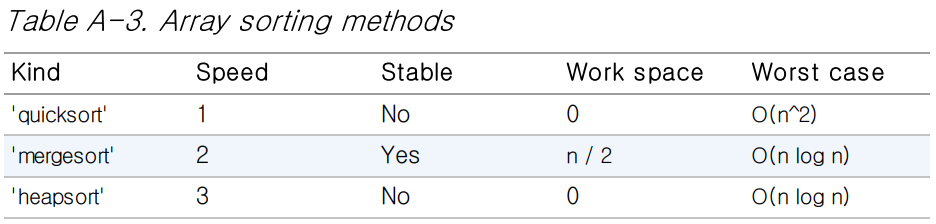

NumPy has fast methods, numpy.partition and
np.argpartition, for partitioning an array around the k-th smallest element:

In [64]:
rng = np.random.default_rng(12345)
arr = rng.standard_normal(20)
arr

In [ ]:
np.partition(arr, 3)

After you call partition(arr, 3), the first three elements in the result are the
smallest three values in no particular order. numpy.argpartition, similar to
numpy.argsort, returns the indices that rearrange the data into the equivalent order:

In [65]:
indices = np.argpartition(arr, 3)
indices


In [ ]:
arr.take(indices)

searchsorted is an array method that performs a binary search on a sorted
array, returning the location in the array where the value would need to be
inserted to maintain sortedness:

In [66]:
arr = np.array([0, 1, 7, 12, 15])
arr.searchsorted(9)

You can also pass an array of values to get an array of indices back:

In [67]:
arr.searchsorted([0, 8, 11, 16])

You might have noticed that searchsorted returned 0 for the 0 element.
This is because the default behavior is to return the index at the left side
of a group of equal values:

In [68]:
arr = np.array([0, 0, 0, 1, 1, 1, 1])
arr.searchsorted([0, 1])

In [ ]:
arr.searchsorted([0, 1], side='right')

As another application of searchsorted, suppose we had an array of
values between 0 and 10,000, and a separate array of “bucket edges”
that we wanted to use to bin the data:

In [69]:
data = np.floor(rng.uniform(0, 10000, size=50))
bins = np.array([0, 100, 1000, 5000, 10000])
data

In [70]:
labels = bins.searchsorted(data)
labels

This, combined with pandas’s groupby, can be used to bin data:

In [71]:
pd.Series(data).groupby(labels).mean()

Numba is an open source project that creates fast functions for NumPylike data.
To introduce Numba, let’s consider a pure Python function that computes
the expression (x - y).mean() using a for loop:

In [72]:
import numpy as np

def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
    return result / count

This function is slow:


In [ ]:
x =rng.standard_normal(10_000_000)
y =rng.standard_normal(10_000_000)
%timeit mean_distance(x, y)


In [ ]:
%timeit (x -y).mean()

We can turn this function into
a compiled Numba function using the numba.jit function:

In [ ]:
import numba as nb
numba_mean_distance =nb.jit(mean_distance)

We also could have written this as a decorator:

In [ ]:
@nb.jit
def numba_mean_distance(x, y):
    nx =len(x)
    result =0.0
    count =0
    for i in range(nx):
        result +=x[i] -y[i]
        count +=1
    return result / count

he resulting function is actually faster than the vectorized NumPy version:

In [ ]:
%timeit numba_mean_distance(x, y)

In the previous example, we could have written:


In [ ]:
from numba import float64, njit
@njit(float64(float64[:], float64[:]))
def mean_distance(x, y):
    return (x -y).mean()

The numba.vectorize function creates compiled NumPy ufuncs, which
behave like built-in ufuncs.

In [ ]:
from numba import vectorize
@vectorize
def nb_add(x, y):
    return x +y

In [ ]:
x =np.arange(10)
nb_add(x, x)


In [ ]:
nb_add.accumulate(x, 0)

NumPy implements a
memmap object that is ndarray-like, enabling small segments of a large file
to be read and written without reading the whole array into memory.
To create a new memory map, use the function np.memmap and pass a
file path, data type, shape, and file mode:

In [73]:
mmap = np.memmap('mymmap', dtype='float64', mode='w+',
                 shape=(10000, 10000))
mmap

Slicing a memmap returns views on the data on disk:

In [74]:
section = mmap[:5]

Any modifications can be
synchronized to disk by calling flush:

In [75]:
section[:] = rng.standard_normal((5, 10000))
mmap.flush()
mmap


In [ ]:
del mmap

When opening an existing memory
map, you still have to specify the data type and shape, as the file is only
a block of binary data without any data type information, shape, or strides:

In [76]:
mmap = np.memmap('mymmap', dtype='float64', shape=(10000, 10000))
mmap

If you ran this example on your computer, you may want to delete the
large file that we created above:

In [77]:
%xdel mmap
!rm mymmap

To say that an array’s memory layout is contiguous means that the
elements are stored in memory in the order that they appear in the array
with respect to FORTRAN (column major) or C (row major) ordering. 
These properties can be explicitly checked via the flags attribute on the ndarray:

In [78]:
arr_c = np.ones((100, 10000), order='C')
arr_f = np.ones((100, 10000), order='F')
arr_c.flags


In [ ]:
arr_f.flags


In [ ]:
arr_f.flags.f_contiguous

In this example, summing the rows of these arrays should, in theory, be
faster for arr_c than arr_f since the rows are contiguous in memory.

In [79]:
%timeit arr_c.sum(1)


In [ ]:
%timeit arr_f.sum(1)

 If you have an array that does not
have the desired memory order, you can use copy and pass either 'C' or 'F':

In [80]:
arr_f.copy('C').flags

When constructing a view on an array, keep in mind that the result is not
guaranteed to be contiguous:

In [81]:
arr_c[:50].flags.contiguous


In [ ]:
arr_c[:, :50].flags